## CV Assignment


###  Program No 3: Implement k-means clustering on suitable data.

In [26]:
import numpy as np
import pandas as pd
import os
import csv
from sklearn.cluster import KMeans

In [27]:
#Feature vector of Cats Dataset
data= pd.read_csv(r'C:\Users\favin\Downloads\File1.csv')

data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0
...,...,...,...,...,...
395,10220446,Female,20,141231,1
396,12387292,Male,50,75848,1
397,10715173,Female,25,82560,1
398,10016842,Male,55,147667,0


In [28]:
New_data=data.iloc[:,1:4]

New_data

,Gender,Age,EstimatedSalary
0,Male,42,121315
1,Male,53,67214
2,Female,59,111005
3,Female,39,53414
4,Male,39,114285
...,...,...,...
395,Female,20,141231
396,Male,50,75848
397,Female,25,82560
398,Male,55,147667


In [29]:
New_data['Gender'] = [1 if x == 'Male' else 0 for x in New_data['Gender']]

In [30]:
New_data

,Gender,Age,EstimatedSalary
0,1,42,121315
1,1,53,67214
2,0,59,111005
3,0,39,53414
4,1,39,114285
...,...,...,...
395,0,20,141231
396,1,50,75848
397,0,25,82560
398,1,55,147667


In [32]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(New_data)
        #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
        wcss.append(kmeans.inertia_) 
        print(i,":",kmeans.inertia_)

C:\Users\favin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 : 321236635800.9675
2 : 77791743543.41501
3 : 39984988715.65231
4 : 19148850734.73479


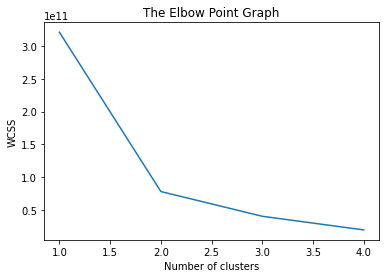

In [33]:
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans= KMeans(n_clusters=2)
kmeans.fit(New_data)

KMeans(n_clusters=2)

In [36]:
#histograms of all the classes

hist=np.histogram(kmeans.labels_,bins=[0,1,2])


print('histogram')
print(hist,"\n")

histogram
(array([200, 200], dtype=int64), array([0, 1, 2])) 



In [37]:
clusters = kmeans.predict(New_data)

In [38]:
clusters

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [39]:
df = pd.DataFrame()
df['cluster'] = clusters
df['class'] = data['Purchased']

C:\Users\favin\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


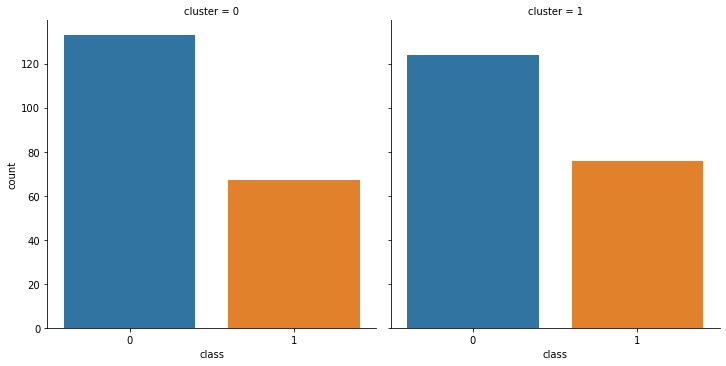

In [40]:
import seaborn as sns
sns.factorplot(col='cluster', y=None, x='class', data=df, kind='count')